In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
## need to do sanity checks
## does the amount equal duration hours time price 

# Reading the data

In [3]:
path = 'stored_data_case.h5'

In [4]:
def read_HDF_file(file_name, table):
    with pd.HDFStore(file_name, complevel=9, complib='blosc') as store:
         return store[table]

In [5]:
df = read_HDF_file(path,'/transaction_and_locations')
df.head()

,parkmeter_id,user_type,payment_method,amount,duration_hours,parking_start,parking_end,parkmeter_address,arrondissement,system,residential_area,hourly_rate,parkmeter_coordinates
0,66391001,Rotatif,CB,2.4,2.00,2014-09-09 14:02:44,2014-09-09 16:02:44,121 BOULEVARD MURAT,16,MIX,16Z,2.4,"48.8373519997, 2.25909199964"
1,66391001,Rotatif,Paris Carte,0.3,0.25,2014-02-09 14:18:09,2014-02-09 14:33:09,121 BOULEVARD MURAT,16,MIX,16Z,2.4,"48.8373519997, 2.25909199964"
2084,66391001,Rotatif,CB,0.6,0.50,2014-05-09 18:55:21,2014-05-09 19:25:21,121 BOULEVARD MURAT,16,MIX,16Z,2.4,"48.8373519997, 2.25909199964"
2085,66391001,Rotatif,CB,0.9,0.75,2014-08-09 16:30:32,2014-08-09 17:15:32,121 BOULEVARD MURAT,16,MIX,16Z,2.4,"48.8373519997, 2.25909199964"
2086,66391001,Rotatif,Paris Carte,0.3,0.25,2014-01-09 18:40:25,2014-01-09 18:55:25,121 BOULEVARD MURAT,16,MIX,16Z,2.4,"48.8373519997, 2.25909199964"


## Sub Sample to experiment

In [7]:
df_test = df[['parkmeter_id', 'user_type', 'payment_method', 'duration_hours', 
                            'amount', 'parking_start', 'parking_end', 'residential_area', 'hourly_rate']].copy()
df_test['year'] = [time.year for time in df_test['parking_start']]

In [8]:
#df_test.to_csv('csv/df_test.csv') # 2GB 
#df_test = pd.read_csv('csv/df_test.csv')
df_test.head()

,parkmeter_id,user_type,payment_method,duration_hours,amount,parking_start,parking_end,residential_area,hourly_rate,year
0,66391001,Rotatif,CB,2.00,2.4,2014-09-09 14:02:44,2014-09-09 16:02:44,16Z,2.4,2014
1,66391001,Rotatif,Paris Carte,0.25,0.3,2014-02-09 14:18:09,2014-02-09 14:33:09,16Z,2.4,2014
2084,66391001,Rotatif,CB,0.50,0.6,2014-05-09 18:55:21,2014-05-09 19:25:21,16Z,2.4,2014
2085,66391001,Rotatif,CB,0.75,0.9,2014-08-09 16:30:32,2014-08-09 17:15:32,16Z,2.4,2014
2086,66391001,Rotatif,Paris Carte,0.25,0.3,2014-01-09 18:40:25,2014-01-09 18:55:25,16Z,2.4,2014


# Create features

## *Parkmeter count by zone*

In [9]:
count_zone = df_test[['parkmeter_id', 'residential_area']].copy()
count_zone = count_zone.drop_duplicates()
count_zone = count_zone.groupby('residential_area').count().reset_index()
print(count_zone.shape)
count_zone.head()

(160, 2)


,residential_area,parkmeter_id
0,10E,61
1,10F,67
2,10G,69
3,11E,64
4,11F,56


/Users/louislimnavong/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


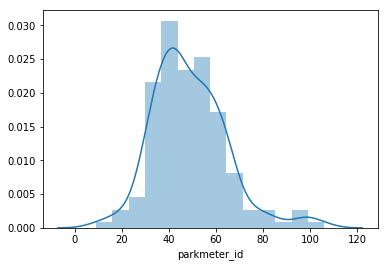

In [10]:
x = count_zone['parkmeter_id']
sns.distplot(x)
plt.show()

## *Average duration hours by zone*

In [11]:
average_duration = df_test.groupby(['parkmeter_id','residential_area'])['duration_hours'].mean().reset_index()
average_duration = average_duration.groupby('residential_area')['duration_hours'].mean().reset_index()
average_duration.head()

,residential_area,duration_hours
0,10E,9.471723
1,10F,8.135806
2,10G,7.406850
3,11E,9.175851
4,11F,10.968004


/Users/louislimnavong/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


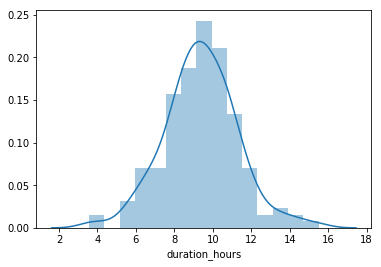

In [14]:
x = average_duration['duration_hours']
sns.distplot(x)
plt.show()

## *Proportion by zones*

In [ ]:
## do we have to group by days ?? 

### User type 

In [13]:
user = df_test.groupby(['parkmeter_id', 'residential_area','user_type'])['payment_method'].count().reset_index()

In [15]:
user_rot = user[user['user_type'] == 'Rotatif']
user_rot = user_rot.rename(index=str, columns={"payment_method": "Rotatif"})
del user_rot['user_type']

user_res = user[user['user_type'] == 'Résident']
user_res = user_res.rename(index=str, columns={"payment_method": "Résident"})
del user_res['user_type']

In [16]:
user_prop = user_res.merge(user_rot, on = ['parkmeter_id', 'residential_area'])
user_prop.head()

,parkmeter_id,residential_area,Résident,Rotatif
0,20301,6E,601,2373
1,40102,14K,754,2003
2,40202,14K,600,1264
3,40401,14K,1097,2188
4,40405,14K,1747,6566


In [17]:
user_zone = user_prop.groupby(['residential_area'])['Résident', 'Rotatif'].sum().reset_index()
user_zone['res_prop'] = user_zone['Résident'] / (user_zone['Résident'] + user_zone['Rotatif'])
user_zone.head()

,residential_area,Résident,Rotatif,res_prop
0,10E,42584,130687,0.245765
1,10F,32191,100235,0.243087
2,10G,42415,103824,0.290039
3,11E,32599,80508,0.288214
4,11F,43286,86233,0.334206


/Users/louislimnavong/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


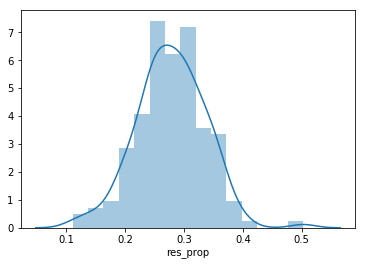

In [18]:
x = user_zone['res_prop']
sns.distplot(x)
plt.show()

### Payment type 

In [19]:
payment = df_test.groupby(['parkmeter_id', 'residential_area','payment_method'])['user_type'].count().reset_index()

In [20]:
cb = payment[payment['payment_method'] == 'CB']
cb = cb.rename(index=str, columns={"user_type": "CB"})
del cb['payment_method']

pc = payment[payment['payment_method'] == 'Paris Carte']
pc = pc.rename(index=str, columns={"user_type": "Paris Carte"})
del pc['payment_method']

In [21]:
payment_prop = cb.merge(pc, on = ['parkmeter_id', 'residential_area'])
payment_zone = payment_prop.groupby(['residential_area'])['Paris Carte', 'CB'].sum().reset_index()
payment_zone['pay_prop'] = payment_zone['Paris Carte'] / (payment_zone['Paris Carte'] + payment_zone['CB'])
payment_zone.head()

,residential_area,Paris Carte,CB,pay_prop
0,10E,102329,77880,0.567835
1,10F,88829,80227,0.525441
2,10G,109162,94886,0.534982
3,11E,75069,62712,0.544843
4,11F,82809,60963,0.575974


/Users/louislimnavong/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


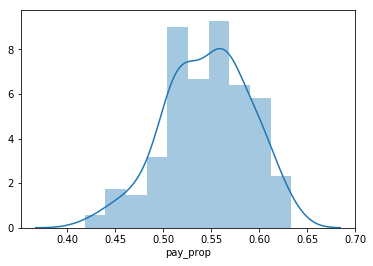

In [22]:
x = payment_zone['pay_prop']
sns.distplot(x)
plt.show()

# Merging features

In [23]:
print(count_zone.shape)
count_zone.head(2)

(160, 2)


,residential_area,parkmeter_id
0,10E,61
1,10F,67


In [24]:
print(average_duration.shape)
average_duration.head(2)

(160, 2)


,residential_area,duration_hours
0,10E,9.471723
1,10F,8.135806


In [25]:
del payment_zone['CB']
del payment_zone['Paris Carte']
print(payment_zone.shape)
payment_zone.head(2)

(160, 2)


,residential_area,pay_prop
0,10E,0.567835
1,10F,0.525441


In [26]:
del user_zone['Résident']
del user_zone['Rotatif']
print(user_zone.shape)
user_zone.head(2)

(160, 2)


,residential_area,res_prop
0,10E,0.245765
1,10F,0.243087


In [27]:
final_temp = user_zone.merge(payment_zone, on = ['residential_area'])
final_temp = final_temp.merge(average_duration, on = ['residential_area'])
final_temp = final_temp.merge(count_zone, on = ['residential_area'])
final_temp.head()

,residential_area,res_prop,pay_prop,duration_hours,parkmeter_id
0,10E,0.245765,0.567835,9.471723,61
1,10F,0.243087,0.525441,8.135806,67
2,10G,0.290039,0.534982,7.406850,69
3,11E,0.288214,0.544843,9.175851,64
4,11F,0.334206,0.575974,10.968004,56


In [28]:
final_temp.to_csv('csv/df_features.csv')
final_temp.to_excel('tables/df_features.xlsx')